(irm-chapitre)=
# Imagerie par résonance magnétique

<table>
  <tr>
    <td align="center">
      <a href="https://github.com/me-pic">
        <img src="https://avatars.githubusercontent.com/u/77584086?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Marie-Eve Picard</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
    </td>
    <td align="center">
      <a href="https://github.com/pbellec">
        <img src="https://avatars.githubusercontent.com/u/1670887?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Pierre bellec</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
        <a title="Quizz">⚠️</a>
        <a title="Révision du texte">👀</a>
    </td>
  </tr>
</table>

## Objectifs du cours
Ce cours a pour but de vous initier aux principes physiques de l'imagerie par résonance magnétique. Au courant de ce cours, nous allons aborder quatre principes fondamentaux de l'IRM:
 * La résonance magnétique
 * La relaxation : paramètres T1 et T2
 * La formation d'images
 * Les séquences IRM

## Anatomie d'un IRM

```{figure} ./irm/irm_schema.png
---
width: 800px
name: irm-schema-fig
---
Illustration schématique des principales composantes d'un appareil IRM. Figure générée par P. Bellec, 2021, sous licence CC-BY.
```
{numref}`irm-schema-fig` nous permet d'observer les éléments principaux d'un appareil IRM, et en particulier:
 * L'**aimant**: il s'agit d'une bobine qui génère un champ magnétique très important. Cette bobine est plongée dans de l'hélium liquide, proche du zéro absolu, ce qui la rend supra-condutrice: le courant électrique qui la traverse ne subit pas de perte d'énergie, et peut continuer de circuler pendant très longtemps. Pour cette raison, l'aimant de l'IRM continue de fonctionner en permanence, même quand on n'utilise pas la machine.

 * Les **bobines de gradient**: permettent de faire varier l'intensité du champ magnétique dans l'espace. Durant l'acquisition des images, les gradients sont activés puis arrêtés plusieurs fois. Les gradients peuvent être produits dans toutes les directions.  

 * L'**antenne radio-fréquence**: permet de (1) exciter la matière grâce à des émetteurs, et (2) mesurer la réponse de ces tissus biologiques à l'excitation grâce à des récepteurs. Les impulsions radio-fréquence générées par l'antenne créent un faible champ magnétique perpendiculaire au champ magnétique principal généré par l'aimant. Les antennes de réception peuvent aussi être placées dans un équipement spécifique pour la tête.

 Nous allons parler plus en profondeur du fonctionnement de tous ces éléments dans les prochaines sections.
```{warning}
L'IRM est très sensible aux mouvements de la tête ! Il est possible d'utiliser des coussins ou autres dispositifs pour réduire le mouvement.
```

```{admonition} Bobine + courant = champ magnétique !
En créant un anneau avec du fil électrique et en passant un courant électrique, nous produisons un champ magnétique. Dans la vidéo ci-dessous, nous pouvons voir les lignes de champ magnétique se dessiner lorsque le champ magnétique est activé. Les lignes de champ sont droites lorsqu'elles passent par le centre de l'anneau, mais elles se propagent en cercles en s'éloignant du centre de l'anneau. Pour obtenir un champ magnétique constant à l'intérieur de l'anneau, nous pouvons épaissir l'anneau de sorte à former un cylindre. C'est le même principe que nous retrouvons dans un appareil IRM !
```

In [1]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/bq6IhapfucE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

```{admonition} IRM et sécurité
L’IRM est non invasif: il n’existe pas d’effet adverse connu sur la santé de l’exposition à un champ magnétique fort.
En revanche, il faut s’assurer qu’il n’y ait pas de contre-indications, telles que la présence de certains métaux dans le corps ou des équipements médicaux tels qu’un pace maker.
Le champ magnétique peut également attirer les objets métalliques et provoquer des accidents. Pour cette raison le personnel qui opère dans une salle d’IRM doit recevoir une formation adéquate aux mesures de sécurité.
```

## Spin magnétique et champ B0
```{figure} ./irm/spin.png
---
width: 500px
name: spin-fig
---
Un proton est comme un petit aimant, dont le champ magnétique oscille autour d’une position donnée (mouvement de précession), et caractérisé par un moment angulaire, ou spin.  Partie droite de la figure générée par P. Bellec, 2021, sous licence CC-BY. La partie gauche de la figure est adaptée d'une image [shutterstock](https://www.shutterstock.com) ID `130826045`, utilisée sous licence shutterstock standard.
```

Les protons qui constituent en partie les atomes se comportent comme des petits aimants qui tournent autour de leur propre axe, de manière analogue à une toupie (voir {numref}`spin-fig`). Cette rotation du moment magnétique est appelé le mouvement de précession et dépend entre autre de la composition du noyau. Ainsi, chaque type de noyau possède une *fréquence de Larmor* caractéristique.

```{admonition} Fréquence de Larmor d'un atome d'hydrogène
Un atome d'hydrogène possède une fréquence de Larmor de 42.58 MHz/Tesla. Cette fréquence n'est donc pas fixe, mais **dépend de la force du champ magnétique!**  Placé dans un champ magnétique externe de 1T, un atome d'hydrogène tourne 42580000 fois par seconde. Plus le champ magnétique dans lequel se trouve un proton est fort, plus la vitesse à laquelle tourne le moment magnétique de ce proton va augmenter.
```

L'aimant de l'IRM contribue à aligner le moment magnétique des protons selon le même axe que le champ magnétique principal, appelé B0. Ce champ B0 va des pieds vers la tête. La force de l'aimant principal est mesurée en Teslas (T). Les appareils de 1.5T sont utilisés principalement à des fins cliniques alors qu'en recherche, le standard est plutôt de 3T, ce qui est environ 60000 fois plus puissant que le champ magnétique terrestre! Les appareils à 7T représentent à ce jour la nouvelle frontière utilisée en recherche, et quelques appareils à 10T+ existent dans le monde. Mais pourquoi voudrions-nous augmenter la force du champ magnétique? En augmentant la force du champ magnétique, nous pouvons gagner en résolution spatiale et temporelle. Par contre, augmenter la force du champ magnétique peut également introduire des artefacts!

## Résonance magnétique
```{admonition} La résonance... pas juste magnétique
Nous retrouvons les phénomènes de résonance dans de nombreuses situations. Un exemple connu est la résonance entre le vent et le pont de Tacoma, qui a mené à l'effondrement du pont, voir la vidéo ci-dessous.
```

In [2]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/3mclp9QmCGs" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Nous pouvons penser à la résonance comme un mouvement de balançoire. Si nous poussons la balançoire de manière aléatoire, elle n'oscille pas beaucoup. Pour avoir un mouvement de balançoire qui s'amplifie, nous devons pousser la balançoire à la même fréquence que la fréquence naturelle de l'oscillation de la balançoire. Nous allons alors **entrer en résonance** avec la balançoire, et son mouvement va s'amplifier. Nous pouvons donc voir la balançoire comme un phénomène de résonance entre l'objet qui se balance et la personne qui donne une impulsion à cet objet.

L'IRM exploite ce phénomène de résonance. **L'antenne radio-fréquence (RF)** crée une série d'**ondes radio-fréquences** dans la direction perpendiculaire au champ B0, c'est-à-dire en direction du champ B1. En produisant une série d'impulsions suivant la fréquence de Larmor de l'hydrogène, les atomes d'hydrogène entrent en résonance et basculent dans la direction perpendiculaire.

En arrêtant les impulsions, les atomes d'hydrogène entrent en relaxation, c'est-à-dire que leur moment magnétique va retourner dans la direction initiale B0. Autrement dit, le moment magnétique en direction B1 décroît pour revenir dans la direction B0. Ce phénomène de relaxation est très important, car la vitesse de la relaxation va dépendre des caractéristiques des tissus qui ont été excités. La vitesse de relaxation est mesurée par les antennes de réception placées dans le casque autour de la tête du sujet!

```{admonition} Mise en phase
:class: tip
:name: phase-tip

Il est important de comprendre que le signal que nous mesurons en IRM ne provient pas d'un unique proton. Pour référence, 18 grammes d'eau contiennent une [mole](https://fr.wikipedia.org/wiki/Mole_(unité)) de molécules H2O, soient environ $10^{24}$ atomes d'hydrogène... Le signal que nous mesurons provient de la juxtaposition des spins de l'ensemble de ces atomes. Une onde radio-fréquence qui entre en résonance avec l'hydrogène ne va pas juste faire basculer les spins, mais aussi les mettre en phase. Imaginez que vous avez mille balançoires, que vous poussez au même moment (à la bonne fréquence). Non seulement le mouvement des balançoires va gagner en amplitude, mais toutes les balançoires seront au même point de leur trajectoire au même moment. C'est la même chose pour les spins après une excitation.
```

```{admonition} Pourquoi radio?
Comme nous l'avons vu, la fréquence de Larmor de l'hydrogène est de 42.58 MHz/Tesla. Dans un IRM à 3T, nous allons donc exciter avec une onde à une fréquence d'environ 120 MHz, soit 120 millions d'ondes par seconde (!). Ce type de fréquences tombe dans le domaine des [ondes radio](https://fr.wikipedia.org/wiki/Onde_radio).
```

## Sélection de coupes et formation d'images  

Nous avons vu comment une onde radio-fréquence permet d'exciter les noyaux d'hydrogène et mesurer la réponse à cette excitation pour interroger les caractéristiques des tissus. Mais comment faire une image? Les **bobines de gradient** permettent de faire varier l'amplitude du champ magnétique dans trois directions:
 * Direction z : des pieds vers la tête
 * Direction x : de la gauche vers la droite
 * Direction y : de l'arrière de la tête vers le nez

Ces variations sont beaucoup plus faibles que le champ B0, et ne représentent qu'une fraction de teslas, mais cela va nous permettre d'extraire une information spatiale dans un processus de résonance. À l'aide de ces gradients, il est possible de mesurer des propriétés magnétiques de tissus situés à un point spécifique dans l'espace, et donc de faire une image (3D). Ce processus est complexe, mais la première étape est relativement simple à comprendre: c'est la sélection de coupe.

Nous nous rappelons que la fréquence de Larmor d'une particule dépend de la force du champ magnétique dans lequel elle se trouve. En changeant la force du champ magnétique dans une direction donnée grâce aux bobines de gradient, nous allons modifier la fréquence de Larmor des atomes d'hydrogène à un endroit précis du gradient. Les impulsions radio-fréquence ne viendront exciter les atomes d'hydrogène que dans la coupe où le champ magnétique a la force qui correspond à la fréquence d'excitation. De cette manière, au lieu de recevoir du signal de l'ensemble du cerveau, nous ne recevons du signal que de la coupe sélectionnée, car seuls les atomes d'hydrogène dans cette coupe seront entrés en résonance.

Il nous reste encore à découper notre coupe en pixels... Mais cela sort largement du contexte de ce chapitre d'introduction. Pour en apprendre plus sur l'encodage spatial en IRM, vous pouvez consulter cette [ressource](https://www.imaios.com/en/e-Courses/e-MRI/Signal-spatial-encoding/Spatial-encoding-intro) (en anglais).

```{admonition} Champ de vue (FOV)
Quand on réalise une image 3D du cerveau, nous allons découper le cerveau en une série de coupes. En connaissant la taille des coupes ainsi que le nombre de coupes, nous pouvons en déduire la taille du cube 3D qui correspond à l'image. Cette taille est appelée champ de vue, ou FOV en anglais (Field of view).
```

```{admonition} L'IRM: un appareil bruyant
L'acquisition d'une image nécessite de modifier les gradients de manière rapide. Les changements rapides de courant dans les bobines de gradient, ainsi que dans les bobines émettrices d'ondes radio-fréquences, provoquent des expansions et des contractions rapides des bobines. Ces mouvements créent un bruit important. Chaque type d'image a sa "musique" propre, qui dépend de la nature et de l'ordre des excitations et des gradients. Voir extraits ci-dessous.
```

In [3]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/9GZvd_4ot04?start=11" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Contrastes $T_1$ et $T_2$
Les contrastes $T_1$ et $T_2$ sont les paramètres principaux acquis durant une séance IRM. Initialement, les spins des protons d'hydrogène sont alignés avec le champ $B_0$. L'application d'impulsions radiofréquences fait basculer les spins selon l'axe $B_1$, axe perpendiculaire à $B_0$. Une fois les impulsions radiofréquences arrêtées, les spins s'alignent avec le champ $B_0$. Ce réalignement est caractérisé par deux dynamiques distinctes, liées aux constantes de temps $T_1$ et $T_2$.

**Relaxation en $T_1$**. L'augmentation de la composante selon $B_0$ (composante $M_z$), ou _relaxation longitudinale_, suit une fonction exponentielle croissante. Le temps caractéristique de cette croissance (la vitesse de croissance) s'appelle le $T_1$. Le temps $T_1$ correspond au temps écoulé pour obtenir 63% de la valeur d'équilibre de la contribution du moment magnétique selon l'axe z ($M_0$). Pour ceux qui sont à l'aise avec les expressions mathématiques, la repousse en $B_0$ suit l'équation $M_z(t) = M_0 ( 1 - e^{-t / T_1})$.

```{figure} ./irm/t1.png
---
width: 800px
name: t1-fig
---
Le processus de relaxation $T_1$. Pour un voxel donné, on mesure la repousse du champ magnétique selon l'axe $B_0$. La vitesse de cette repousse dépend de deux paramètres: la valeur d'équilibre $M_0$ et le temps $T_1$. En général, on ne mesure qu'un seul point de la courbe, au temps `TE`, et on parle alors de signal pondéré en $T_1$. Figure adaptée de {cite:p}`Ridgway2010-dc` sous license [CC-BY 2.0](https://creativecommons.org/licenses/by/2.0).
```

**Pondération en $T_1$**. Pour estimer le paramètre $T_1$, il est nécessaire d'effectuer plusieurs mesures au cours du temps pour évaluer la croissance de la courbe. En général, on ne mesure qu'un seul point de la courbe, au temps `TE`, et on parle alors de signal pondéré en $T_1$. Si le paramètre $T_1$ augmente, cela veut dire que la courbe croit plus lentement, et le signal pondéré en $T_1$ va diminuer. Différents tissus (matière grise, matière blanche, liquide céphalo-rachidien) ont des caractéristiques $T_1$ différentes, ce qui permet d'obtenir des images d'IRM structurelle.

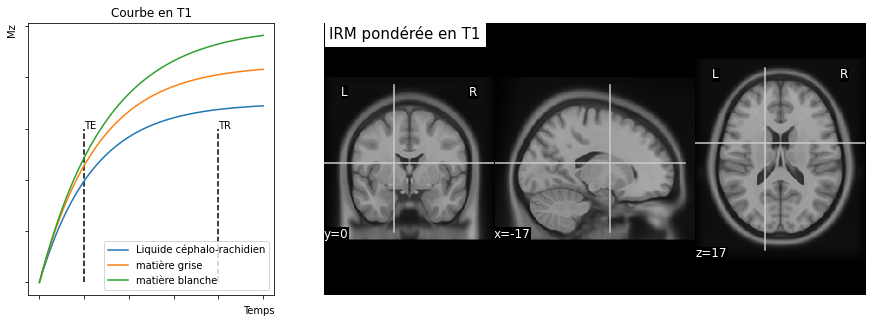

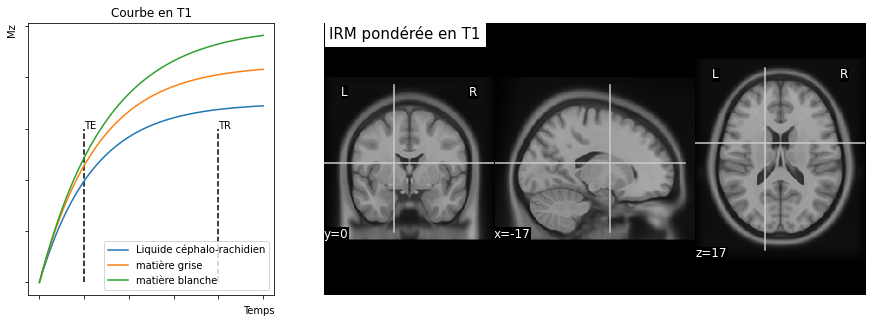

In [4]:
# Enlève les warnings
import warnings
warnings.filterwarnings("ignore")

# Importer les librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue

# Initialise la figure
fig = plt.figure(figsize=(15, 5))

# Fonctions exponentielles pour les courbes T1 (à titre d'exemple seulement)
t = np.linspace(0,5,100)
y1 = 70 * (1 - np.exp(-t / 1.2))
y2 = 85 * (1 - np.exp(-t / 1.3))
y3 = 100 * (1 - np.exp(-t / 1.5))

# Tracer la figure
ax_plot = plt.subplot(1, 3, 1)
plt.plot(t, y1, label="Liquide céphalo-rachidien")
plt.plot(t, y2, label="matière grise")
plt.plot(t, y3, label="matière blanche")
plt.vlines(1, 0, 60, colors="black", linestyles="--")
plt.text(1, 60, "TE")
plt.vlines(4, 0, 60, colors="black", linestyles="--")
plt.text(4, 60, "TR")
plt.xlabel("Temps", loc="right")
plt.ylabel("Mz", loc="top")
plt.title("Courbe en T1")
plt.legend()
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticklabels([])

#Importer les modules requis et le jeu de données
from nilearn.datasets import fetch_icbm152_2009
from nilearn.plotting import plot_anat

data_mri = fetch_icbm152_2009()

# afficher l'image pondérée en T1
ax_plot = plt.subplot2grid((1, 3), (0, 1), colspan=2)
plot_anat(data_mri.t1, figure=fig, title="IRM pondérée en T1", axes=ax_plot,
    cut_coords=[-17, 0, 17])

glue("relax-t1-fig", fig, display=False)

```{glue:figure} relax-t1-fig
:figwidth: 800px
:name: "relax-t1-fig"
Relaxation longitudinale et contraste $T_1$. Image de gauche: croissance du champ magnétique selon l'axe $B_0$, appelé $M_{z}$. Notez que différents types de tissus présentent des courbes distinctes de relaxation longitudinale. Image de droite: une image générée par lecture au temps $TE$ (pondéré en $T_1$) présente un contraste entre les différents types de tissus. Cette figure est générée par du code python, cliquer sur + pour voir le code.
```

```{admonition} M0
:class: tip
:name: M0-tip
À l'état d'équilibre, la contribution du moment magnétique selon l'axe $B_0$ est appelée $M_0$. Cette valeur dépend de la densité de protons dans les tissus, c'est-à-dire du nombre d'atomes d'hydrogène présents dans le tissu. Ainsi, d'un voxel à un autre, nous n'obtenons pas nécessairement la même valeur de $M_0$. Il est possible d'imager ce paramètre, et on parle alors d'image en densité de protons (PD en anglais, pour proton density).
```

**Relaxation en $T_2$**. La diminution de la composante selon $B_1$ (composante $M_{xy}$), ou _relaxation transverse_, suit une fonction exponentielle décroissante. Le temps caractéristique de cette décroissance (la vitesse de décroissance) s'appelle le $T_2$. Le temps $T_2$ correspond au temps écoulé pour obtenir 37% de la valeur de la contribution du moment magnétique initial selon l'axe $B_1$. Pour ceux qui sont à l'aise avec les expressions mathématiques, la décroissance en $B_1$ suit l'équation $M_{xy}(t) = M_1 e^{-t / T_2}$. La constante $M_1$ va dépendre entre autres choses de la densité de protons, comme $M_0$, et va varier d'un tissu à l'autre.

```{figure} ./irm/t2.png
---
width: 800px
name: t2-fig
---
Le processus de relaxation $T_2$. Pour un voxel donné, on mesure la décroissance du champ magnétique selon l'axe $B_1$. La vitesse de cette décroissance dépend du temps $T_2$. En général, on ne mesure qu'un seul point de la courbe, au temps `TE`, et on parle alors de signal pondéré en $T_2$. Figure adaptée de {cite:p}`Ridgway2010-dc` sous license [CC-BY 2.0](https://creativecommons.org/licenses/by/2.0).
```

**Pondération en $T_2$**. Comme vu précédemment, on ne mesure généralement qu'un seul point de la courbe, au temps `TE`, et on parle alors de signal pondéré en $T_2$. Si le paramètre $T_2$ augmente, cela veut dire que la courbe décroit plus lentement, et le signal pondéré en $T_2$ va augmenter. Différents tissus (matière grise, matière blanche, liquide céphalo-rachidien) ont des caractéristiques $T_2$ différentes, ce qui permet d'obtenir des images d'IRM structurelle comme pour le $T_1$. En général, les images $T_1$ et $T_2$ sont presque mirroirs l'une de l'autre, mais comme le $T_2$ est très sensible au déphasage, l'information capturée sur les tissus est complémentaire.

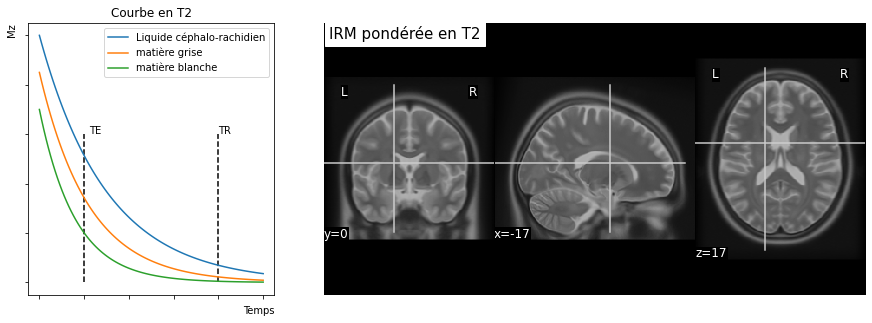

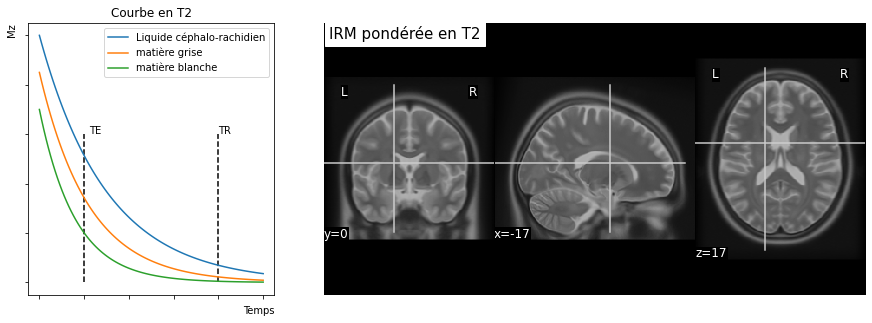

In [5]:
# Enlève les warnings
import warnings
warnings.filterwarnings("ignore")

# Importer les librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue

# Initialise la figure
fig = plt.figure(figsize=(15, 5))

# Fonctions exponentielles pour les courbes T2 (à titre d'exemple seulement)
t = np.linspace(0, 5, 100)
y1 = 100 * np.exp(-t / 1.5)
y2 = 85 * np.exp(-t / 1.1)
y3 = 70 * np.exp(-t / 0.8)

# Tracer la figure
ax_plot = plt.subplot(1, 3, 1)
plt.plot(t, y1, label="Liquide céphalo-rachidien")
plt.plot(t, y2, label="matière grise")
plt.plot(t, y3, label="matière blanche")
plt.vlines(1, 0, 60, colors="black", linestyles="--")
plt.text(1.1, 60, "TE")
plt.vlines(4, 0, 60, colors="black", linestyles="--")
plt.text(4, 60, "TR")
plt.xlabel("Temps", loc="right")
plt.ylabel("Mz", loc="top")
plt.title("Courbe en T2")
plt.legend()
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticklabels([])

#Importer les modules requis et le jeu de données
from nilearn.datasets import fetch_icbm152_2009
from nilearn.plotting import plot_anat

data_mri = fetch_icbm152_2009()

# afficher l'image pondérée en T2
ax_plot = plt.subplot2grid((1, 3), (0, 1), colspan=2)
plot_anat(data_mri.t2, figure=fig, title="IRM pondérée en T2", axes=ax_plot,
    cut_coords=[-17, 0, 17])

glue("relax-t2-fig", fig, display=False)

```{glue:figure} relax-t2-fig
:figwidth: 800px
:name: "relax-t2-fig"
Relaxation transverse et contraste $T_2$. Image de gauche: décroissance du champ magnétique selon l'axe $B_1$, appelé $M_{xy}$. Notez que différents types de tissus présentent des courbes distinctes de relaxation transverse. Image de droite: une image générée par lecture au temps $TE$ présente un contraste entre les différents types de tissus. Ce contraste est pour l'essentiel inversé par rapport au contraste $T_1$. Cette figure est générée par du code python, cliquer sur + pour voir le code.
```
```{admonition} $TE$
Lorsque nous acquérons des données IRM, nous ne mesurons généralement pas toute la courbe de relaxation, mais simplement un point de mesure au temps $TE$. En choisissant le $TE$ adéquatement, nous allons obtenir des valeurs de lecture très différentes pour les différents tissus. Le temps $TE$ sera différent pour un contraste $T_1$ et un contraste $T_2$.
```

```{admonition} $TR$
Nous appelons $TR$ le temps qui sépare deux séries d'excitations. Cette valeur va correspondre au temps d'acquisition d'une coupe pour un IRM structurel, et le temps d'acquisition d'un volume cérébral complet en IRMf. C'est une convention bizarre, mais très utilisée par les physiciens IRM.
```
```{admonition} angle de bascule
Si nous nous intéressons à la fin du processus de relaxation, nous n'avons pas besoin de basculer les spins complètement dans la direction $B_1$, mais simplement à un certain nombre de degrés de $B_0$. Ce paramètre est appelé angle de bascule ("flip angle" en anglais).
```
```{admonition} $T_1$ vs $T_2$: cherchez la différence.
:class: tip
:name: diff-t1-t2-tip
Pourquoi s'embêter à faire des contrastes $T_1$ et $T_2$ quand l'un semble être l'exact opposé de l'autre? Observez  bien les images {numref}`relax-t1-fig` et {numref}`relax-t2-fig`. Y a-t-il certaines régions du cerveau où l'image $T_2$ n'est pas l'exact opposé de l'image $T_1$?
```

## $T_2^*$, IRMf, IRMd
**Déphasage.** Comme nous l'avons vu dans l'encadré {ref}`sur la phase <phase-tip>`, les impulsions radiofréquences vont non seulement faire basculer les spins, mais aussi les mettre en phase. Lorsque nous arrêtons les impulsions, les spins vont progressivement se déphaser. Ce déphasage est dû à des micro-interactions entre protons ainsi que des molécules des tissus qui présentent des propriétés magnétiques. La courbe de relaxation va avoir la même forme, mais avec des temps caractéristiques modifiés, que nous appelons $T_1^*$ et $T_2^*$.

**IRM fonctionnelle.** Les inhomogénéités dans le champ magnétique qui causent le déphasage peuvent notamment être créées par la désoxyhémoglobine que nous retrouvons dans le sang. Nous allons voir plus en détails comment l'oxyhémoglobine et la désoxyhémoglobine perturbent le champ magnétique dans le chapitre sur l'[IRM fonctionnelle](https://psy3018.github.io/irm_fonctionnelle.html). En IRM fonctionnelle, nous utilisons des séquences pondérées en T2*.


**IRM de diffusion.** En IRM de diffusion, nous utilisons également un contraste en T2*. Par contre, en IRM de diffusion, nous mesurons les inhomogénéités en alternant la direction des impulsions (ex. en donnant une impulsion selon l'axe xy, puis en donnant une impulsion selon l'axe -xy). En effectuant plusieurs images avec des directions d'excitation différentes, nous pouvons obtenir une idée de la direction de la diffusion de l'eau. Cette opération nous permet au final de connaître la direction des fibres de matière blanche, car plus une fibre pointe vers une direction donnée, plus la diffusion sera grande dans cette direction. Nous allons revenir sur ce sujet dans le chapitre sur [l'IRM de diffusion](https://psy3018.github.io/irm_diffusion.html)

## Console et séquences d'acquisition.
```{figure} ./irm/irm_console.png
---
width: 500px
name: irm-console-fig
---
Connexions entre la console et les différentes parties d'un système IRM. Figure adaptée par P. Bellec, 2021, sous licence CC-BY. La Figure originale est tirée de l'article par Gruber et coll. (2018) {cite:p}`Gruber2018-pq`, sous licence CC-BY-NC.
```

L'ensemble des éléments de l'appareil IRM peuvent être contrôlés par la console (voir {numref}`irm-console-fig`). Nous avons vu ensemble les principes clés de l'IRM, mais une image réelle est acquise avec une série complexe d'excitations et de mesures, que l'on appelle une _séquence d'acquisition_.

```{figure} ./irm/fov.png
---
width: 500px
name: fov-fig
---
Le champ de vue est un paramètre important des séquences IRM. Il définit la position et la taille du volume cérébral acquis. On définit généralement une matrice correspondant au plan de coupes, dont la taille est définie par le nombre de voxels. On définit ensuite le nombre de coupes, et enfin la taille des voxels. En combinant ces informations, on peut en déduire la taille du champ de vue. Schéma par Pierre Bellec, sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).

```

Une fois la séquence programmée, nous pouvons toujours modifier certains paramètres de la séquence, comme par exemple:
* $TE$
* $TR$
* champ de vue (field of view, FOV)
* Nombre de coupes
* Épaisseur des coupes
* Taille des voxels.


## Conclusions
Ce chapitre vous a introduit aux principes physiques de l'IRM. Nous avons vu les différentes composantes d'un appareil IRM, les différents phénomènes magnétiques nous permettant d'acquérir des images, ainsi que quelques paramètres que nous pouvons modifier lors de l'acquisition de données IRM. Lors du prochain chapitre, nous parlerons de morphométrie à l'aide de l'IRM structurelle.

## Ressources supplémentaires
La physique de l'IRM est un domaine très riche, que l'on n'a fait que commencer à découvrir. Quelques ressources pour un point de vue différent ou bien pour aller plus loin:
 * [Plus de détails](https://mriquestions.com/what-is-t2.html) sur le processus de relaxation.
 * Une [explication en vidéo](https://www.youtube.com/watch?v=TQegSF4ZiIQ) de la résonance magnétique nucléaire.
 * Une (longue) série de cours sur la physique de l'IRM, en [vidéos youtube](https://www.youtube.com/watch?v=35gfOtjRcic).

## Références

```{bibliography}
:filter: docname in docnames
```

## Exercices

```{admonition} Exercice 1
:class: note
Vrai ou faux?
 1. TE < TR
 2. TE > T1
 3. La force du champ magnétique d’un IRM est liée à la taille de l’IRM.
 4. Les ventricules sont blancs dans une IRM pondérée en T1
```

```{admonition} Exercice 2
:class: note
Choisissez la bonne réponse. un proton d’hydrogène a...

 1. Une fréquence de rotation fixe durant une acquisition IRM, c’est la fréquence de Larmor.
 2. Une fréquence de rotation variable durant une acquisition IRM.
 3. Une fréquence de rotation qui dépend de la force du champ magnétique dans l'IRM.
 4. Réponses 1 et 3.
 5. Réponses 2 et 3.
```

```{admonition} Exercice 3
:class: note
On effectue une acquisition T1 avec un champ de vue de 200mm x 200mm x 150 mm, une résolution de 2 mm x 2 mm dans la coupe, et une épaisseur de coupe de 1,5 mm. Quelle est la taille du champ de vues, exprimée en nombre de voxels?
```

```{admonition} Exercice 4
:class: note
On souhaite isoler le thalamus sur une image anatomique individuelle. Quel contraste utiliser: T1, T2 ou les deux? Justifiez votre réponse.
```

```{admonition} Exercice 5
:class: note
On décide de modifier une séquence IRM pour diminuer l’angle de bascule: les spins basculeront de 70 degrés, au lieu de 90 degrés. Quel sera l’effet sur le TR de cette modification?
```

```{admonition} Exercice 6
:class: note
Pour répondre à cette question, lisez l'article de Shukla et collaborateurs, "_Aberrant Frontostriatal Connectivity in Negative Symptoms of Schizophrenia_", publié dans Schizophrenia Bulletin (2019, 45(5): 1051-59) et disponible en libre accès à cette [adresse](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6737477/). Les questions suivantes sont à développement court.
 1. Quelle est la force de l'aimant de l'IRM?
 2. Quel est le TR de l'acquisition structurelle?
 3. Quel est le TE de l'acquisition structurelle?
 4. Quel est le nom de la séquence utilisée pour l'acquisition structurelle?
 5. Quelle est la taille du champ de vue, exprimée en mm et dans les trois dimensions?
```